In [1]:
import kfood_dataset

dataset path : /Users/hwijin/Desktop/Code/ml/KFood/kfood True


2022-01-26 14:54:02.256388: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-26 14:54:02.256525: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



In [2]:
filepaths = kfood_dataset.get_image_paths()

In [3]:
filepaths[0]

'kfood/조림/우엉조림/Img_114_0719.jpg'

In [4]:
a = [filepath.split('.')[-1] for filepath in filepaths]

In [5]:
from collections import Counter

b = Counter(a)
b.most_common()

[('jpg', 150087), ('png', 343), ('jpeg', 77)]

In [23]:
print(path)
new_path = path.split('.')[0] + "." + path.split('.')[-1].lower()
print(new_path)


kfood/구이/갈비구이/Img_000_0031.JPG
kfood/구이/갈비구이/Img_000_0031.jpg


In [24]:
import tensorflow as tf
image = tf.io.read_file(new_path)
image = tf.io.decode_jpeg(image)

In [25]:
dataset = kfood_dataset.make_kfood_dataset(filepaths, batch_size=32)

2022-01-26 14:45:58.528247: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-26 14:45:58.531678: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


tf.Tensor([[141]], shape=(1, 1), dtype=int64)
tf.Tensor([[22]], shape=(1, 1), dtype=int64)
tf.Tensor([[113]], shape=(1, 1), dtype=int64)
tf.Tensor([[140]], shape=(1, 1), dtype=int64)


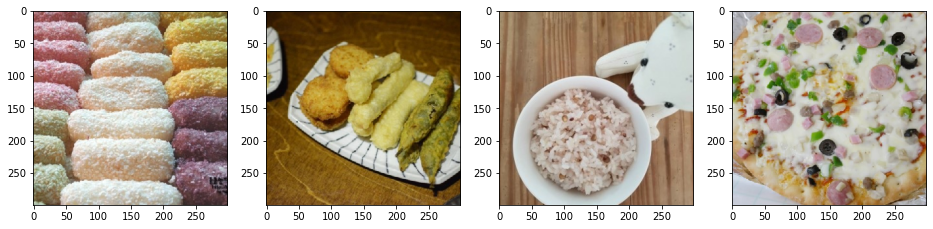

In [26]:
kfood_dataset.plot_dataset_image_4(dataset)

In [7]:
import kfood_dataset

paths = kfood_dataset.get_image_paths()

In [8]:
dataset = kfood_dataset.make_kfood_dataset(paths, shuffle_buffer_size=10000, cache=True)

TypeError: in user code:

    /Users/hwijin/Desktop/Code/ml/KFood/kfood_dataset.py:82 get_image_paths  *
        image_paths = sorted(glob(dataset_path + "/*/*/*"))
    /Users/hwijin/miniforge3/envs/tf25/lib/python3.8/glob.py:21 glob  *
        return list(iglob(pathname, recursive=recursive))
    /Users/hwijin/miniforge3/envs/tf25/lib/python3.8/glob.py:42 _iglob  **
        dirname, basename = os.path.split(pathname)
    /Users/hwijin/miniforge3/envs/tf25/lib/python3.8/posixpath.py:103 split
        p = os.fspath(p)

    TypeError: expected str, bytes or os.PathLike object, not Tensor
